# Data Scientist Associate Case Study

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Case Study Submission

Use this template to complete your analysis and write up your summary for submission.


In [2]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above
#Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading data into pandas
moped_data=pd.read_csv('data/moped.csv')
moped_data.head(5)

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0


In [3]:
# basic information of data
moped_data.info()

print(moped_data.shape)

#check categorical columns
print (moped_data[['Used it for']].value_counts() )
print(moped_data[['Owned for']].value_counts() )
print(moped_data[['Model Name']].value_counts())

#Describe data
moped_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB
(713, 9)
Used it for
Commuting      553
Leisure        160
dtype: int64
Owned for  
> 6 months     290
<= 6 months    288
Never owned    135
dtype: int64
Model Name             
Hero Electric Flash        94
Hero Electric Optima       75
Okinawa Praise             73
Revolt RV 400              44
PURE EV EPluto 7G          4

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713.000000,713.000000,183.000000,510.000000,176.000000,370.00000
mean,3.768583,3.314165,2.928962,3.650980,3.392045,3.37027
std,1.359949,1.584523,1.637602,1.404368,1.389653,1.52688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,3.000000,2.000000,1.000000,3.000000,2.000000,2.00000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,4.00000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [4]:
#Missing value
#checking for missing values
print(moped_data.isnull().sum())

#imputing null values with zero
moped_data_notnull=moped_data.fillna(0)


Used it for           0
Owned for             0
Model Name            0
Visual Appeal         0
Reliability           0
Extra Features      530
Comfort             203
Maintenance cost    537
Value for Money     343
dtype: int64


In [5]:
#checking for duplicated values
moped_data_notnull.duplicated().sum()

105

In [6]:
# Combining duration owned
moped_data_notnull["Owned for"]=moped_data_notnull["Owned for"].replace(["> 6 months","<= 6 months"],"Owned")

#Renaming columns
cols={'Owned for':'Ownership Status','Used it for':'Usage Purpose','Maintenance cost':'Maintenance Cost'}
moped_data_notnull.rename(columns=cols,inplace=True)
moped_data_notnull.columns

Index(['Usage Purpose', 'Ownership Status', 'Model Name', 'Visual Appeal',
       'Reliability', 'Extra Features', 'Comfort', 'Maintenance Cost',
       'Value for Money'],
      dtype='object')

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

*We have 713 data points.The data has 9 columns. 3 columns are of type object while 6 columns are of type float. The motorcycles are used for 2 purpose which are leisure and commuting. We have 39 different models of the motorcycle. I have renamed column 'Used it for'  to 'Usage Purpose' so that the column can be easily understood. I have renamed column 'Owned for '  to 'Ownership Status' which better describes the values of the column. On Ownership Status columns, I have combined "> 6 months" and "<= 6 months" to "Owned". Therefore the column has now two categories. Four columns had null values. I replaced null values with Zero in column 'Extra Feature' , 'Comfort', 'Maintenance Cost ' and 'Value for Money' . No data anomalies or outliers were detected. There is possible duplication of 146 rows. This is hard to tell since we do not have unique id in the data frame*

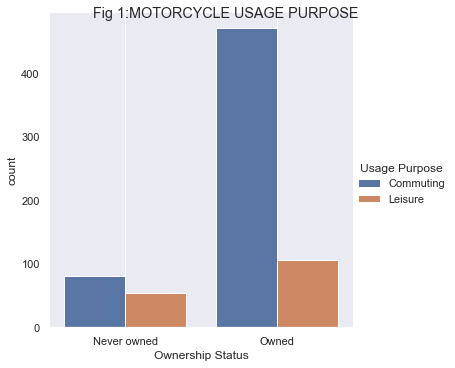

In [7]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

#visualize distribution of ownership status and Usage Status
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_theme(style="darkgrid")
g=sns.catplot(x="Ownership Status", hue="Usage Purpose",
                data=moped_data_notnull, kind="count")

g.fig.suptitle("Fig 1:MOTORCYCLE USAGE PURPOSE")
plt.grid()

TABLE 1

In [8]:
#Top 5 motorcyle Model
Motorcycle=pd.DataFrame(moped_data_notnull['Model Name'].value_counts()).sort_values(by=['Model Name'],ascending=False).iloc[0:8,]
Motorcycle.head()

,Model Name
Hero Electric Flash,94
Hero Electric Optima,75
Okinawa Praise,73
Revolt RV 400,44
PURE EV EPluto 7G,40


Text(0.5, 0.98, 'Fig 2 :VARIABLE DISTRIBUTION ')

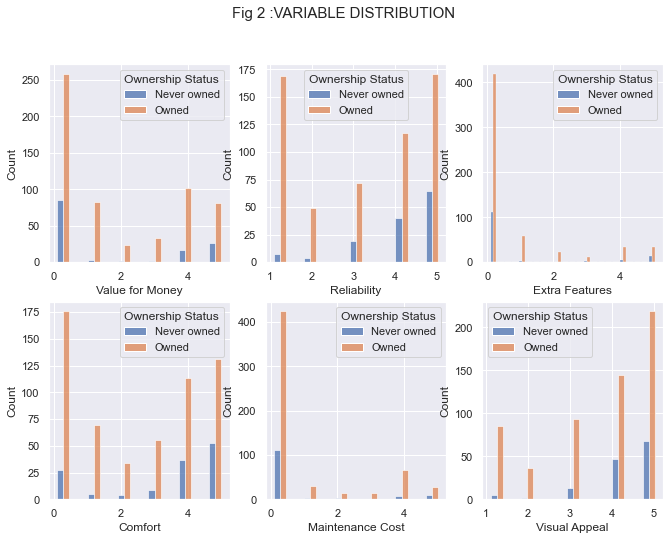

In [9]:
# plotting  distribution of the motorcycle 
fig,axes=plt.subplots(2,3,figsize=(11,8))
sns.histplot(data=moped_data_notnull, x="Value for Money", hue="Ownership Status", multiple="dodge", shrink=.8,ax=axes[0,0])
sns.histplot(data=moped_data_notnull, x="Reliability", hue="Ownership Status", multiple="dodge", shrink=.8,ax=axes[0,1])
sns.histplot(data=moped_data_notnull, x="Comfort", hue="Ownership Status", multiple="dodge", shrink=.8,ax=axes[1,0])
sns.histplot(data=moped_data_notnull, x="Maintenance Cost", hue="Ownership Status", multiple="dodge", shrink=.8,ax=axes[1,1])
sns.histplot(data=moped_data_notnull, x="Extra Features", hue="Ownership Status", multiple="dodge", shrink=.8,ax=axes[0,2])
sns.histplot(data=moped_data_notnull, x="Visual Appeal", hue="Ownership Status", multiple="dodge", shrink=.8,ax=axes[1,2])
fig.suptitle("Fig 2 :VARIABLE DISTRIBUTION ", fontsize=15)

PIVOT TABLE 1

In [10]:
pd.pivot_table(moped_data_notnull,index='Ownership Status',values=['Reliability','Maintenance Cost','Comfort','Extra Features','Value for Money', 'Visual Appeal'],aggfunc=np.mean,margins=True)

,Comfort,Extra Features,Maintenance Cost,Reliability,Value for Money,Visual Appeal
Ownership Status,,,,,,
Never owned,3.355556,0.733333,0.666667,4.125926,1.562963,4.266667
Owned,2.437716,0.756055,0.877163,3.124567,1.792388,3.652249
All,2.611501,0.751753,0.837307,3.314165,1.748948,3.768583


PIVOT TABLE 2

In [11]:
pd.pivot_table(moped_data_notnull,index='Usage Purpose',values=['Reliability','Maintenance Cost','Comfort','Extra Features','Value for Money', 'Visual Appeal'],aggfunc=np.mean,margins=True)

,Comfort,Extra Features,Maintenance Cost,Reliability,Value for Money,Visual Appeal
Usage Purpose,,,,,,
Commuting,2.473779,0.748644,0.873418,3.159132,1.725136,3.687161
Leisure,3.087500,0.762500,0.712500,3.850000,1.831250,4.050000
All,2.611501,0.751753,0.837307,3.314165,1.748948,3.768583


                  Visual Appeal  Reliability  Extra Features   Comfort  \
Visual Appeal          1.000000     0.776160        0.136179  0.461473   
Reliability            0.776160     1.000000        0.149766  0.481192   
Extra Features         0.136179     0.149766        1.000000 -0.634629   
Comfort                0.461473     0.481192       -0.634629  1.000000   
Maintenance Cost       0.067773     0.087367        0.857739 -0.666216   
Value for Money        0.275947     0.317751       -0.429223  0.613437   

                  Maintenance Cost  Value for Money  
Visual Appeal             0.067773         0.275947  
Reliability               0.087367         0.317751  
Extra Features            0.857739        -0.429223  
Comfort                  -0.666216         0.613437  
Maintenance Cost          1.000000        -0.450587  
Value for Money          -0.450587         1.000000  


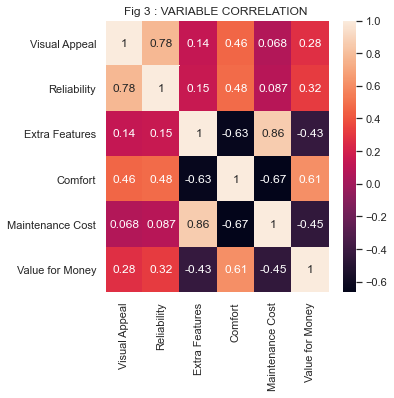

In [12]:
# computting correlation between variables
cor=moped_data_notnull.corr()
print(cor)

#correlation plot
k=sns.heatmap(cor,annot=True).set(title="Fig 3 : VARIABLE CORRELATION ")



<AxesSubplot:xlabel='Comfort', ylabel='Maintenance Cost'>

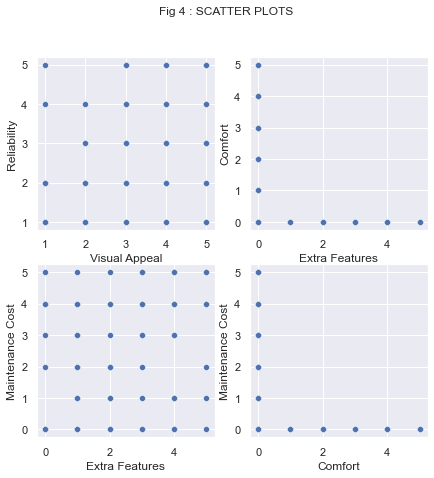

In [13]:
#plotting scatterplot 
fig,axes=plt.subplots(2,2,figsize=(7,7))
fig.suptitle("Fig 4 : SCATTER PLOTS", fontsize=12)
sns.scatterplot(data=moped_data_notnull, x="Visual Appeal", y="Reliability", ax=axes[0,0])
sns.scatterplot(data=moped_data_notnull, x="Extra Features", y="Comfort", ax=axes[0,1])
sns.scatterplot(data=moped_data_notnull, x="Extra Features", y="Maintenance Cost", ax=axes[1,0])
sns.scatterplot(data=moped_data_notnull, x="Comfort", y="Maintenance Cost", ax=axes[1,1])


## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Fig 1 one clearly shows that most of reviews have been given by owners of Moped motorcycles. Majority of the motorcycles are used for commuting. Our data is therefore imbalanced.
Table 2 shows that models with most reviews were Hero Electric Flash , Hero Electric Optima and Okinawa Praise. From Fig 2 we can see that Visual Appeals and Reliability were rated highly by owners of Moped motorcycle while Maintenance Features and Extra Features were rated lowly. The distribution of ratings is similar between between owners and non owners of motorcycles. Pivot Table 2 shows that distribution of ratings are similar between category of people who use motorcycle for leisure  and commuting. People who use motorcycle for leisure had higher average ratings on Visual Appeal, Reliability and Comfort. From fig 3 we see that Extra Feature was highly positive correlated with Maintenance Cost. From scatterplot in fig 4 is clear that the variables have non linear relationship*

In [14]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

#import necessary library
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier as GBC
from sklearn.preprocessing import StandardScaler as SC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline





In [15]:
# Dropping column Model Name
df=moped_data_notnull.drop('Model Name',axis=1)
df['Ownership Status']=df['Ownership Status'].replace(['Owned','Never owned'],[1,0])
df.head()

y=df['Ownership Status']

# creating predictor variable
X=df[['Usage Purpose','Visual Appeal', 'Reliability',
       'Extra Features', 'Comfort', 'Maintenance Cost', 'Value for Money']]



In [16]:

#splitting data into numerical and categorical
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

# dispatch columns to different processor
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

#Create Transformer and assign to different Columns
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [17]:
# splitting data into training and test data 
X_train, X_test, y_train, y_test=train_test_split( X, y, test_size=0.33,stratify=y, random_state=42)

In [18]:
#initiating Logistic Model model

model1 = make_pipeline(preprocessor, LR())
model1.fit(X_train,y_train)
preds1=model1.predict(X_test)
from sklearn.model_selection import cross_validate



In [28]:
#Tuning the Logistic Regression
params={'classifier__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'classifier__penalty':['l1', 'l2', 'elasticnet', 'none'],
        'classifier__max_iter':[100,200,500]
       }
        
model_tuned = Pipeline([('processor',preprocessor),
                         ('classifier',LR())
                   ])

model1_tuned = RandomizedSearchCV(estimator = model_tuned,
                               param_distributions = params,
                               n_iter = 3, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
model1_tuned.fit(X_train, y_train)

preds4=model1_tuned.predict(X_test)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [20]:
#Initiating Random Forest Classifier Model
model2=make_pipeline(preprocessor, RandomForestClassifier())
model2.fit(X_train,y_train)
preds2=model2.predict(X_test)



In [21]:
# Tuning the Random Classifier Model

# Number of trees in random forest
n_estimators = np.linspace(100, 3000, 10).astype(int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               #'classifier__bootstrap': bootstrap,
               'classifier__criterion': criterion
              }

In [22]:
from sklearn.pipeline import Pipeline

rf_base = Pipeline([('processor',preprocessor),
                         ('classifier',RandomForestClassifier())
                   ])
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 4, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)

pred3=rf_random.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

*This is a machine classification problem. Classification is branch of supervised learning. The model is predicting whether the review was provided by a person who owns moped motorcycle. Ownership status is our target variable.
I selected Logistic Model as my baseline model. Logistic models are easier to implement, intepret and also it is easier to train. 
I selected Random Forest Classifier as my comparison model.Random Forest uses bagging algorithim called ensembling learning that reduces overfitting problem. It is also esier to implement and interpret. *

In [23]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score

In [24]:
# Model 1 - Logistic Regression
cv_results = cross_val_score(model1_tuned, X_test, y_test, cv=3)
print(cv_results.mean())



Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.7797792924375203


In [205]:
# Model 2 Random Forest Classifier
cv_results = cross_val_score(rf_random, X_test, y_test, cv=3)
print(cv_results.mean())


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.7797792924375203


## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

*I have used cross validation score to evaluate my model. Cross validation score shows how well the model will perform on unseen data. Logistic Regression has cross validation score of 0.80. This implies that the model will predict correctly 80 % of times. Random Forest Classifier has cross validation score of  0.80%.. Logistic Regression Classifier perfomed better than Random Forest Classifier*

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study